### Table of Contents 
* [Introduction](#Introduction)
* [About the Dataset](#About-the-Dataset)
* [SQL Code](#SQL-Code)
* [Data Exploration](#Data-Exploration)
* [Aggregated Table](#Aggregated-Table)
* [Distribution Chart](#Distribution-Chart)
* [Chi-Square Test of Independence](#Chi-Square-Test-of-Independence)
* [Creating a Contingency Table](#Creating-a-Contingency-Table)
* [Chi-Square Test Code](#Chi-Square-Test-Code)
* [Chi-Square Test Results](#Chi-Square-Test-Results)
* [Conclusion](#Conclusion)

## Introduction
<div style="text-align: justify;">
Welcome to the analysis of the Brazilian e-commerce dataset from Olist Store. This project aims to test the influence of payment methods on purchase frequency and determine its statistical significance in relation to the broader population. By examining various aspects of the dataset, we hope to uncover insights that can benefit sellers on the e-commerce platform.
<br>
<br>
<strong>Influence of Payment Methods on Purchase Frequency:</strong><br>
<br>
    We hypothesize that certain payment methods are preferred by customers and lead to higher purchase frequency. Sellers can offer and promote these preferred payment methods to increase sales.<br>
</div>

## About the Dataset
 
The dataset can be found on <strong>kaggle</strong> <a href="https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce">click here to view the dataset on kaggle</a>

This dataset contains public information on orders made at Olist Store, a Brazilian e-commerce platform. It includes details of 100,000 orders from 2016 to 2018 across various marketplaces in Brazil.

While this dataset offers a comprehensive view of sales during that period, it does not cover the entire population of all possible sales data. Therefore, it is considered a **sample dataset**.

**Hypothesis testing** is essentially a method to determine if the observations from a sample can be generalized to the broader population. It helps to assess whether the patterns or effects seen in the sample data are likely to be true for the entire population or if they could have occurred by random chance.

### Accessing the data
The dataset consists of 8 csv files. I've imported these files into [DB Browser for SQLite](https://sqlitebrowser.org/) to query the data needed for each step and upload the files into my github repository to  be used in jupyter notebooks.

Please refer to the data schema below:

<img src="https://github.com/Mpakong/Marcel_Peter_Kong_Portfolio/blob/main/images/schema.png?raw=true">


## SQL Code
#### Data required:
##### from the olist_order_payments_dataset table:
 - order_id - unique identifier of an order.<br>
- payment_type - method of payment chosen by the customer.<br>
##### from the olist_order_customer_dataset table:
- customer_id - key to the orders dataset. Each order has a unique customer_id.<br>
- customer_unique_id - unique identifier of a customer.<br>
- customer_zip_code_prefix - first five digits of customer zip code<br>
- customer_city - customer city name<br>
- customer_state - customer state<br>
##### from the olist_orders_dataset table:
- customer_id - key to the customer dataset. Each order has a unique customer_id.<br>
- order_id - unique identifier of the order.
***
  
```sql
SELECT c.customer_unique_id, c.customer_id, o.order_id, p.payment_type,
       c.customer_zip_code_prefix, c.customer_city, c.customer_state
  FROM olist_customers_dataset as c
  LEFT JOIN olist_orders_dataset as o
    ON c.customer_id = o.customer_id
  LEFT JOIN olist_order_payments_dataset as p
    ON p.order_id = o.order_id
 lIMIT 5;
```
***

**Preview of the first 5 rows:**
<table>
  <thead>
    <tr>
      <th>customer_unique_id</th>
      <th>customer_id</th>
      <th>order_id</th>
      <th>payment_type</th>
      <th>customer_zip_code_prefix</th>
      <th>customer_city</th>
      <th>customer_state</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>861eff4711a542e4b93843c6dd7febb0</td>
      <td>06b8999e2fba1a1fbc88172c00ba8bc7</td>
      <td>00e7ee1b050b8499577073aeb2a297a1</td>
      <td>credit_card</td>
      <td>14409</td>
      <td>franca</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>290c77bc529b7ac935b93aa66c333dc3</td>
      <td>18955e83d337fd6b2def6b18a428ac77</td>
      <td>29150127e6685892b6eab3eec79f59c7</td>
      <td>credit_card</td>
      <td>9790</td>
      <td>sao bernardo do campo</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>060e732b5b29e8181a18229c7b0b2b5e</td>
      <td>4e7b3e00288586ebd08712fdd0374a03</td>
      <td>b2059ed67ce144a36e2aa97d2c9e9ad2</td>
      <td>credit_card</td>
      <td>1151</td>
      <td>sao paulo</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>259dac757896d24d7702b9acbbff3f3c</td>
      <td>b2b6027bc5c5109e529d4dc6358b12c3</td>
      <td>951670f92359f4fe4a63112aa7306eba</td>
      <td>credit_card</td>
      <td>8775</td>
      <td>mogi das cruzes</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>345ecd01c38d18a9036ed96c73b8d066</td>
      <td>4f2d8ab171c80ec8364f7c12e35b23ad</td>
      <td>6b7d50bd145f6fc7f33cebabd7e49d0f</td>
      <td>credit_card</td>
      <td>13056</td>
      <td>campinas</td>
      <td>SP</td>
    </tr>
  </tbody>
</table>


```sql
CREATE TABLE olis_data AS
SELECT c.customer_unique_id, c.customer_id, o.order_id, p.payment_type,
       c.customer_zip_code_prefix, c.customer_city, c.customer_state
  FROM olist_customers_dataset as c
  LEFT JOIN olist_orders_dataset as o
    ON c.customer_id = o.customer_id
  LEFT JOIN olist_order_payments_dataset as p
    ON p.order_id = o.order_id
```
Created a new table using the above query then exported it as a csv file.
the csv file is uploaded into my github repository to be used in jupyter notebook as a dataframe for our analysis.

## Data Exploration


In [9]:
import pandas as pd
olist_data = pd.read_csv("https://raw.githubusercontent.com/Mpakong/Marcel_Peter_Kong_Portfolio/refs/heads/main/projects/Brazilian%20E-Commerce%20Public%20Dataset%20by%20Olist%20(kaggle)/olis_data.csv")
olist_data.head()

,customer_unique_id,customer_id,order_id,payment_type,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,credit_card,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,credit_card,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,credit_card,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,credit_card,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,credit_card,13056,campinas,SP


In [10]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   customer_unique_id        103887 non-null  object
 1   customer_id               103887 non-null  object
 2   order_id                  103887 non-null  object
 3   payment_type              103886 non-null  object
 4   customer_zip_code_prefix  103887 non-null  int64 
 5   customer_city             103887 non-null  object
 6   customer_state            103887 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.5+ MB


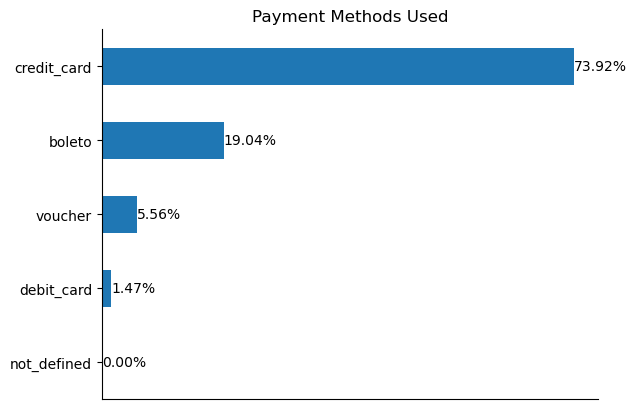

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

payment_types = (olist_data['payment_type'].value_counts(normalize=True)*100).sort_values()
ax = payment_types.plot.barh()
for index, value in enumerate(payment_types):
    ax.annotate(f'{value:.2f}%', xy=(value, index), va='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
plt.ylabel('')
plt.title('Payment Methods Used')
plt.show()


## Aggregated Table

1. We need to group the dataset by the customer_unique_id and count the number of orders for each.

2. To get the most frequent payment type of each customer, we will use the **Mode**. In statistics, the mode is the value that appears most often in a set of data values. Mode (statistics). (2024) Wikipedia. Available at: https://en.wikipedia.org/wiki/Mode_(statistics)


In [12]:
# Define a function to get the mode or a default value
def get_mode_or_default(series):
    mode = series.mode()
    return mode[0] if not mode.empty else 'None'

# Aggregate data by customer_unique_id
aggregated_data = olist_data.groupby('customer_unique_id').agg(
    number_of_orders=('order_id', 'count'),
    most_frequent_payment_type=('payment_type', get_mode_or_default)
).sort_values(ascending=False, by='number_of_orders').reset_index()

print(aggregated_data[0:5])


                 customer_unique_id  number_of_orders  \
0  9a736b248f67d166d2fbb006bcb877c3                33   
1  8af7ac63b2efbcbd88e5b11505e8098a                29   
2  569aa12b73b5f7edeaa6f2a01603e381                26   
3  f9ae226291893fda10af7965268fb7f6                23   
4  2524dcec233c3766f2c2b22f69fd65f4                22   

  most_frequent_payment_type  
0                    voucher  
1                    voucher  
2                    voucher  
3                    voucher  
4                    voucher  


## Distribution Chart

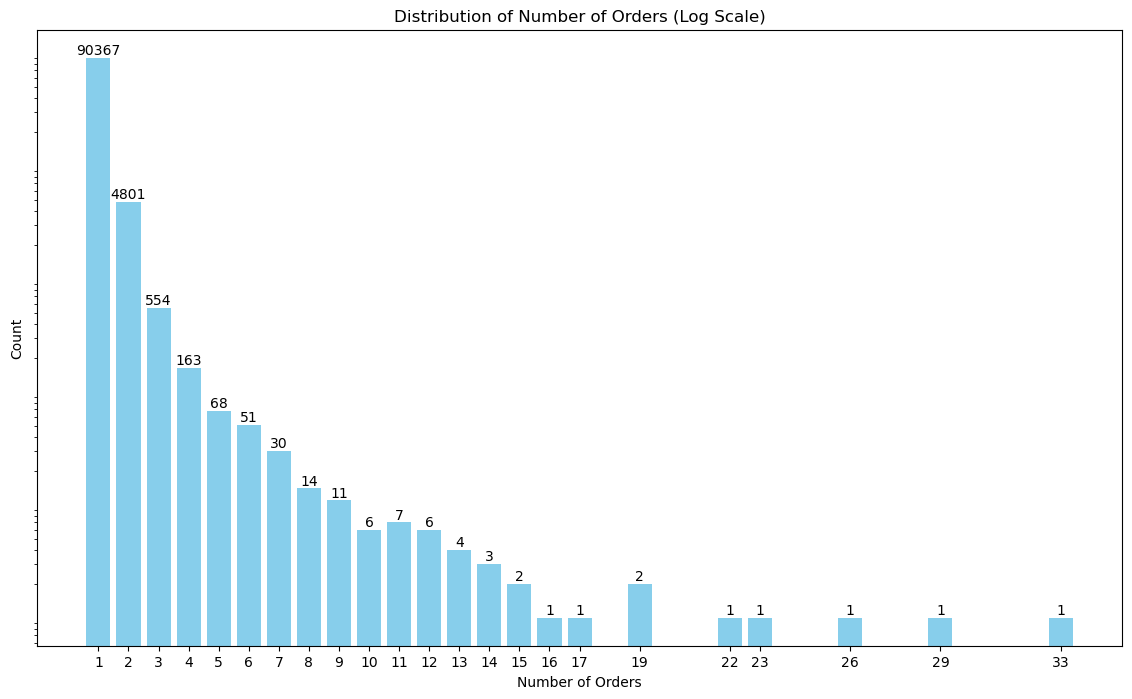

In [13]:
number_of_orders = aggregated_data['number_of_orders'].value_counts()

# Create a bar plot with a log scale
plt.figure(figsize=(14, 8))
bars = plt.bar(number_of_orders.index, number_of_orders.values, color='skyblue')
plt.xlabel('Number of Orders')
plt.ylabel('Count')
plt.title('Distribution of Number of Orders (Log Scale)')
plt.xticks(rotation=360)
plt.yscale('log')
plt.yticks([])
plt.xticks(ticks=number_of_orders.index, labels=number_of_orders.index, rotation=360)
# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')

plt.show()


## Chi-Square Test of Independence
<div style="text-align: justify;">
Compares the observed frequencies in the contingency table to the expected frequencies to determine if there is a significant association between the payment types and frequency of orders.

**Observed Frequencies** (Contingency Table): These are the actual counts from our contingency table. For example, the number of times each payment method was used for different order frequencies.

**Expected Frequencies**: These are the counts we would expect if there were no association between the variables. The expected frequencies are calculated based on the marginal totals of the contingency table.

**Null Hypothesis (H0):**
There is no association between payment methods and purchase frequency. In other words, the preference for certain payment methods does not lead to higher purchase frequency.

**Alternative Hypothesis (H1):**
Certain payment methods are preferred by customers and lead to higher purchase frequency.

In hypothesis testing, the null hypothesis is what we aim to test against. If our test results show a significant association (as indicated by a low p-value), we can reject the null hypothesis in favor of the alternative hypothesis. If the results are not significant, we fail to reject the null hypothesis, meaning there is not enough evidence to support the alternative hypothesis.

**Performing a Chi-Square Test of Independence.**

To draw a conclusion in a Chi-Square Test of Independence, we can use either the p-value or the test statistic(Chi-Square Statistic) as they both lead to the same decision.

1. Using the **P-Value**:

   - Compare the p-value to the chosen significance level(commonly 0.05)
   - if the p-value is less than 0.05, we reject the null hypothesis, indicating a significant association between the variables.
   - if the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis, indicating no significant association.<br>

2. Using the test statistic (<strong>Chi-Square Statistic</strong>):

   - Compare the test statistic(Chi-Square Statistic) to the critical value(Calculated based on the degrees of freedom and significance level) we will use the python function [**chi2.ppf** from scipy.stats library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html).
   - if the test statistic is greater than the critical value, we reject the null hypothesis, indicating a significant association between the variables.
   - if the test statistic is less than or equal to the critical value, we fail to reject the null hypothesis, indicating no significant association.<br>

**scipy.stats.chi2_contingency function**<br>

This function takes a contingency table as input and performs the Chi-Square Test of Independence. It returns four values:

1. chi2: The Chi-Square Statistic, which measures the difference between the observed and expected frequencies.

2. p: The p-value, which indicates the probability that the observed differences are due to chance. A low p-value (typically < 0.05) suggests that the observed differences are statistically significant.

3. dof: Degrees of freedom, which is a parameter used in the calculation of the Chi-Square Statistic. It is determined by the number of categories in the contingency table.

4. expected: The expected frequencies, which are the counts you would expect if there were no association between the variables.

</div>

## Creating a Contingency Table
A **contingency table**, also known as a cross-tabulation or crosstab, is a type of table used in statistics to display the frequency distribution of variables. It helps to understand the relationship between two categorical variables by showing how the variables interact with each other.

In [14]:
# Set display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width
pd.set_option('display.width', None)  # Set display width to None to avoid line breaks

# Create a contingency table
contingency_table = pd.crosstab(aggregated_data['most_frequent_payment_type'], aggregated_data['number_of_orders'])

contingency_table

number_of_orders,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,22,23,26,29,33
most_frequent_payment_type,,,,,,,,,,,,,,,,,,,,,,,
None,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
boleto,18600,607,48,7,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
credit_card,69293,3949,212,53,14,5,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
debit_card,1447,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
not_defined,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
voucher,1024,227,294,103,53,43,28,12,10,6,7,6,4,3,2,1,0,2,1,1,1,1,1


## Chi-Square Test Code

In [15]:
import scipy.stats as stats

# Perform the Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

critical_value = stats.chi2.ppf(0.95,dof)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p:.2f}")
print(f"Critical value: {critical_value}")

Chi-Square Statistic: 19887.701696111933
p-value: 0.00
Critical value: 135.48017792835952


## Chi-Square Test Results
<div style="text-align: justify;">
<strong>Chi-Square Statistic:</strong> 19887.701696111933<br>
<br>
The critical value is the threshold that the Chi-Square statistic must exceed to reject the null hypothesis. Since the Chi-Square statistic (19887.701696111933) is much higher than the <strong>critical value</strong> (135.48017792835952), it indicates a significant association between the variables.
<br>
<br>
<strong>p-value</strong>: 0.00<br>
<br>

This means the probability of the observed differences occurring by random chance is zero. This indicates that the results are statistically significant.

<strong>Hypotheses</strong>:<br>

**Null Hypothesis (H0)**: There is no association between payment methods and purchase frequency. In other words, the preference for certain payment methods does not lead to higher purchase frequency.

<strong>Alternative Hypothesis (H1)</strong>: Certain payment methods are preferred by customers and lead to higher purchase frequency.

## Conclusion

Since the Chi-Square statistic is much higher than the critical value and the p-value is zero, we can reject the null hypothesis. This means there is enough evidence to support our alternative hypothesis, suggesting a significant association between payment methods and order frequencies in the dataset. The observed distribution of payment methods is not due to random chance, and there is a meaningful relationship between how often customers order and the payment methods they use.

1. **Credit Card**:

    The most frequently used payment method, especially for customers with higher order frequencies.

2. **Boleto**:

    Another popular payment method, particularly for customers with fewer orders.

3. **Voucher**:

    This payment method is also preferred by customers with higher order frequencies. The number of customers using vouchers increases with the number of orders, indicating a preference among frequent buyers.

</div>

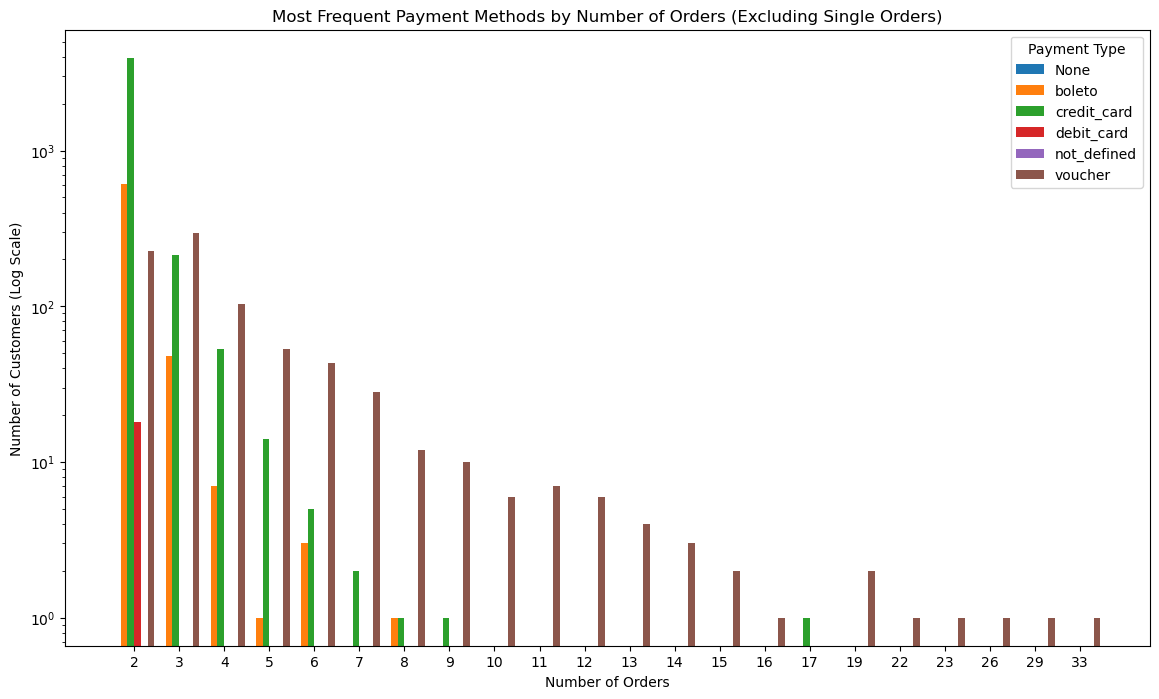

In [20]:
# Exclude single orders
contingency_table = contingency_table.drop(columns=[1])

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Define the positions for the groups
bar_width = 0.15
index = np.arange(len(contingency_table.columns))

# Plot each payment method
for i, payment_type in enumerate(contingency_table.index):
    ax.bar(index + i * bar_width, contingency_table.loc[payment_type], bar_width, label=payment_type)

# Add labels and title
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Number of Customers (Log Scale)')
ax.set_title('Most Frequent Payment Methods by Number of Orders (Excluding Single Orders)')
ax.set_xticks(index + bar_width * (len(contingency_table.index) - 1) / 2)
ax.set_xticklabels(contingency_table.columns)
ax.set_yscale('log')
ax.legend(title='Payment Type')

plt.show()
